In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\shari\\Desktop\\My projects\\Machine learning projects\\archive\\youtube.csv')
df.head()

,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
0,#1,MrBeast,799,274M,50.98B,Entertainment
1,#2,T-Series,21.12K,267M,257.16B,Music
2,#3,Cocomelon - Nursery Rhymes,1.18K,176M,182.88B,Kids
3,#4,SET India,138.97K,173M,164.71B,Entertainment
4,#5,✿ Kids Diana Show,1.22K,123M,103.5B,Kids


In [4]:
most_views_df = df[['NAME_OF_CHANNEL', 'VIEWS']].sort_values('VIEWS', ascending = False)
most_views_df.head(10)

,NAME_OF_CHANNEL,VIEWS
5,Vlad and Niki,90.94B
461,MSA previously My Story Animated,9.9B
384,Susy Mouriz,9.99B
393,Wow Kidz Action,9.98B
390,Pragati Verma Shorts,9.95B
284,Preston,9.91B
314,Las Ratitas,9.89B
372,deepesh zo,9.87B
358,Netflix India,9.82B
476,SCTV,9.7B


In [5]:
total_vids_df = df[['NAME_OF_CHANNEL', 'TOTAL_NUMBER_OF_VIDEOS']].sort_values('TOTAL_NUMBER_OF_VIDEOS', ascending = False)
total_vids_df.head(10)

,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS
225,Topper Guild,992
237,Yoeslan,989
214,BeatboxJCOP,977
292,TRANS7 OFFICIAL,97.68K
397,Panda Shorts,954
441,Nasya Official,944
200,Willie Salim,941
404,Justin Flom,933
398,RKD Studios,928
196,That Little Puff,924


([<matplotlib.patches.Wedge at 0x27864f2a6f0>,
 [Text(0.4485804963754451, 1.1130029372250372, ' Entertainment          '),
  Text(-1.1980189890882067, 0.06892388398858436, ' Music                  '),
  Text(-0.5597543954843471, -1.0614494885466539, ' Kids                   '),
  Text(0.20253055100334305, -1.0811944209578046, ' Gaming/Entertainment   '),
  Text(0.568146541199224, -0.94191799416051, ' Education              '),
  Text(0.757699355648626, -0.79742817008785, ' News                   '),
  Text(0.8915671925403453, -0.6442887094973239, ' Movies                 '),
  Text(0.9629883400161307, -0.5316516312332518, ' Animation              '),
  Text(0.991934824660312, -0.47546325160428154, ' Food                   '),
  Text(1.0121890364129311, -0.4306661753208187, ' Kids             '),
  Text(1.025420646197036, -0.3981362811310386, ' Sports/Entertainment   '),
  Text(1.0352540444990146, -0.37181858929918027, ' Sports                 '),
  Text(1.0444121178183796, -0.345258349

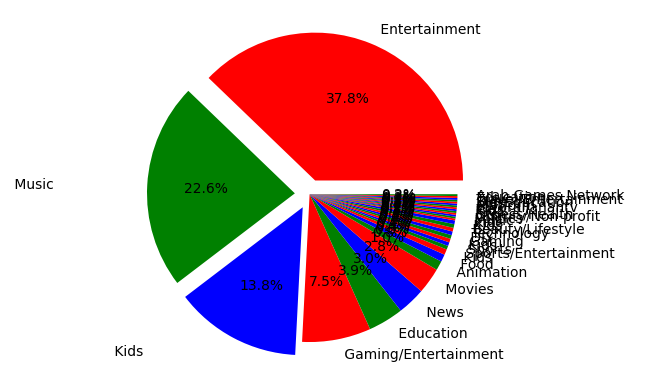

In [6]:
numbers_df = df['CATEGORY'].value_counts()
explode_array = np.zeros(32)
for i in range(3):
    explode_array[i] = 0.1
plt.pie(numbers_df, labels = numbers_df.index, colors = ['r', 'g', 'b'],
autopct = '%.1f%%', explode = explode_array)

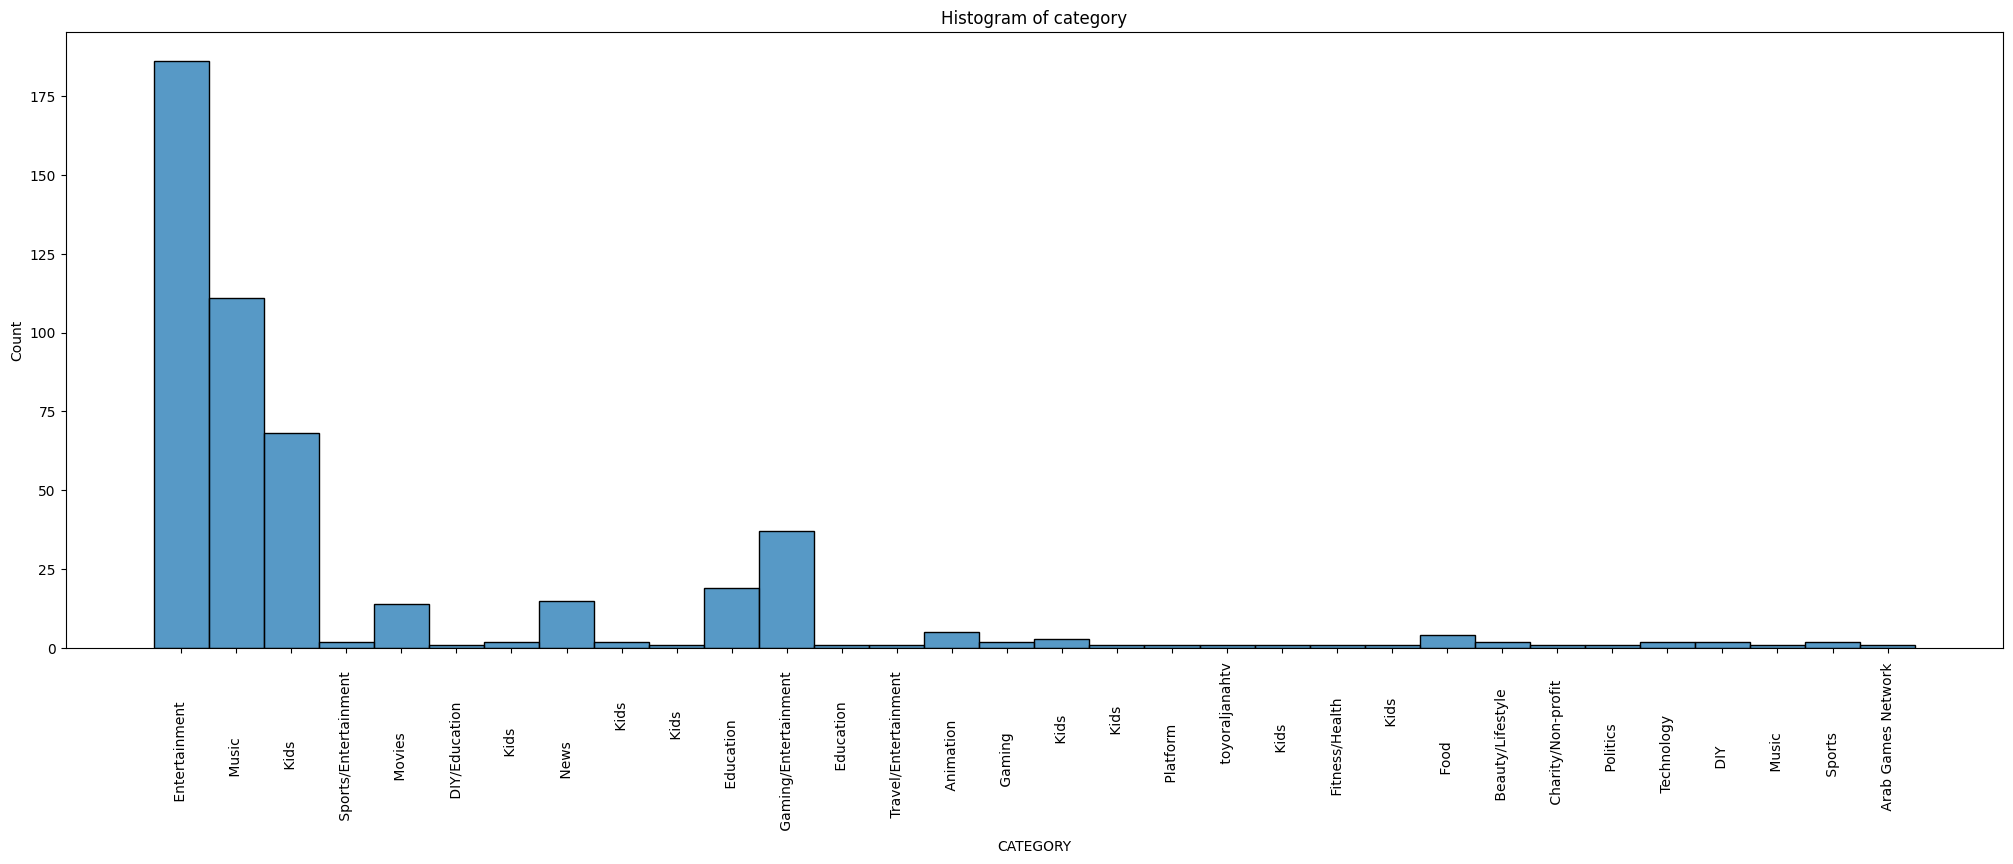

In [7]:
plt.figure(figsize = (25, 8))
sns.histplot(df, x = 'CATEGORY')
plt.title('Histogram of category')
plt.xticks(rotation = 90)
plt.show()

In [8]:
cat = df.groupby('CATEGORY')['SUBSCRIBERS'].sum().reset_index().sort_values('SUBSCRIBERS', ascending = False)
cat.head(10)

,CATEGORY,SUBSCRIBERS
21,Movies,97.2M61.4M53.5M40.1M33.3M32.6M31.5M30.5M27.1M2...
5,DIY/Education,80.7M
19,Kids,75.3M26M
24,News,65.2M43.8M41.9M35.9M29.8M28.3M28M25.6M23.9M23....
14,Kids,56.9M29.1M
16,Kids,56.8M
7,Education,53.4M45.8M45M41M39.9M31.9M29.3M28.7M25.6M24.5M...
12,Gaming/Entertainment,50.5M50.2M49.5M47.6M44.1M44M42.3M41M40.4M39.8M...
6,Education,49.4M
30,Travel/Entertainment,43M


In [9]:
df.isna().sum()
df = df.fillna('X')
df.isna().sum()
df = df[df['NAME_OF_CHANNEL'] != 'X']
df = df[df['CATEGORY'] != 'X']
df.shape

(485, 6)

In [10]:
def convert_to_number(s):
    if isinstance(s, (int, float)):
        return s
    if 'K' in s:
        return float(s.replace('K', '')) * 1000
    elif 'M' in s:
        return float(s.replace('M', '')) * 1000000
    elif 'B' in s:
        return float(s.replace('B', '')) * 1000000000
    else:
        return float(s)

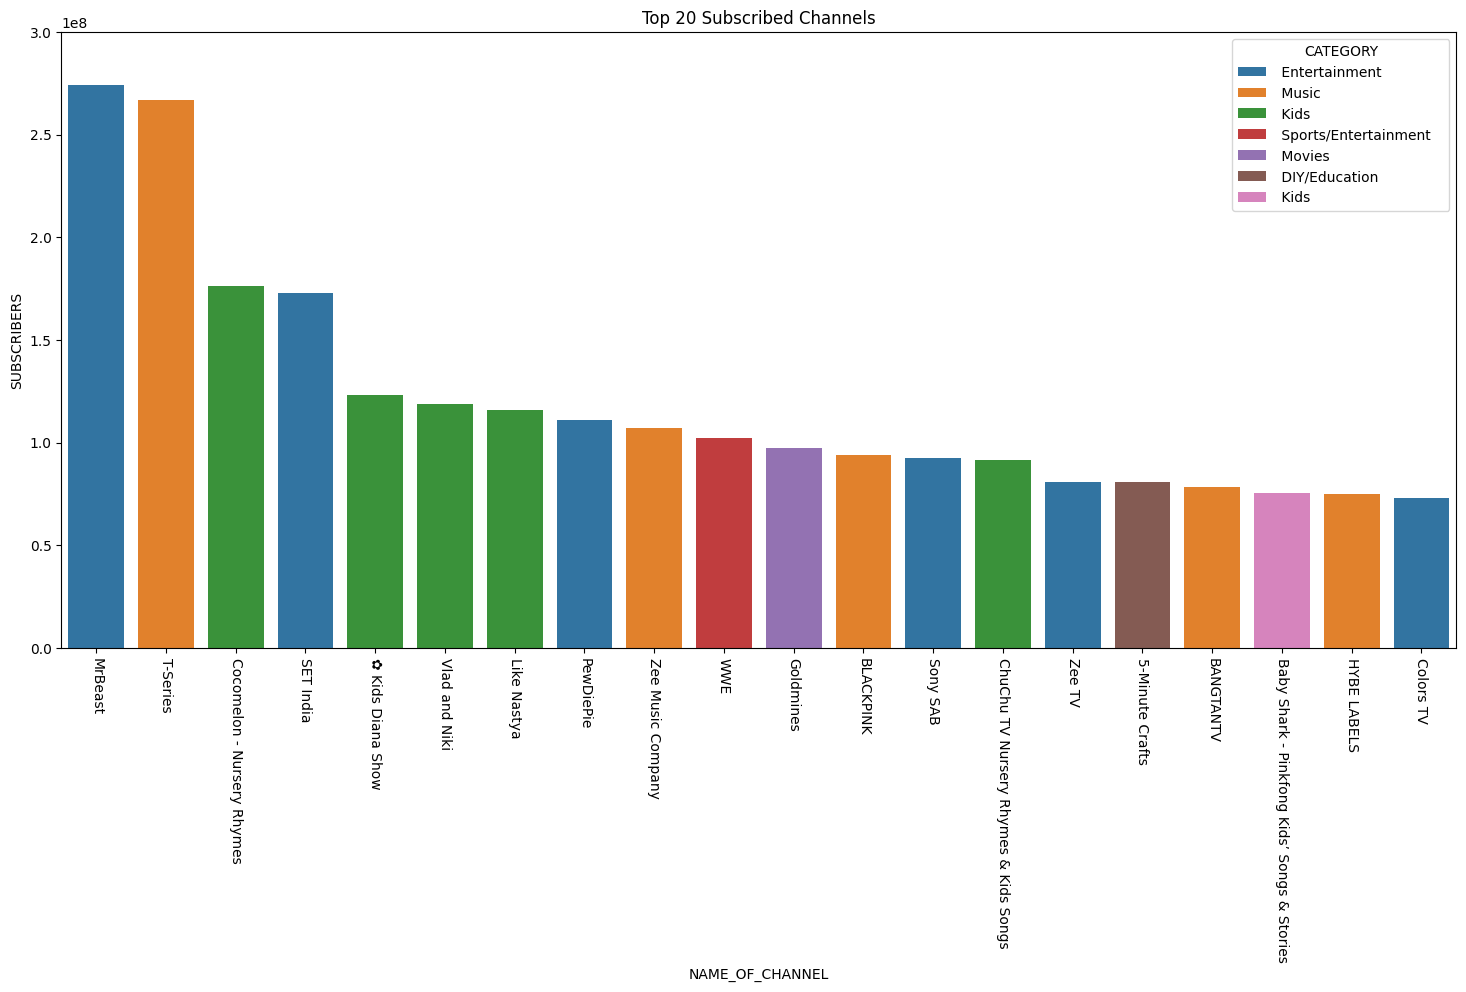

In [11]:
df['TOTAL_NUMBER_OF_VIDEOS'] = df['TOTAL_NUMBER_OF_VIDEOS'].apply(convert_to_number)
df['SUBSCRIBERS'] = df['SUBSCRIBERS'].apply(convert_to_number)
df['VIEWS'] = df['VIEWS'].apply(convert_to_number)

subs_df = df.sort_values('SUBSCRIBERS', ascending = False)
subs_df = subs_df[['NAME_OF_CHANNEL', 'SUBSCRIBERS', 'CATEGORY']].head(20)
plt.figure(figsize = (18, 8))
sns.barplot(subs_df, x = 'NAME_OF_CHANNEL', y = 'SUBSCRIBERS', hue = 'CATEGORY')
plt.xticks(rotation = -90)
plt.ylim(0, 3.0 * 1e8)
plt.title('Top 20 Subscribed Channels')
plt.show()

C:\Users\shari\AppData\Local\Temp\ipykernel_15024\312181034.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(vids_df, x = 'NAME_OF_CHANNEL', y = 'TOTAL_NUMBER_OF_VIDEOS', palette = 'viridis')
C:\Users\shari\AppData\Local\Temp\ipykernel_15024\312181034.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right')
C:\Users\shari\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shari\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3656 (\N{THAI CHARACTER 

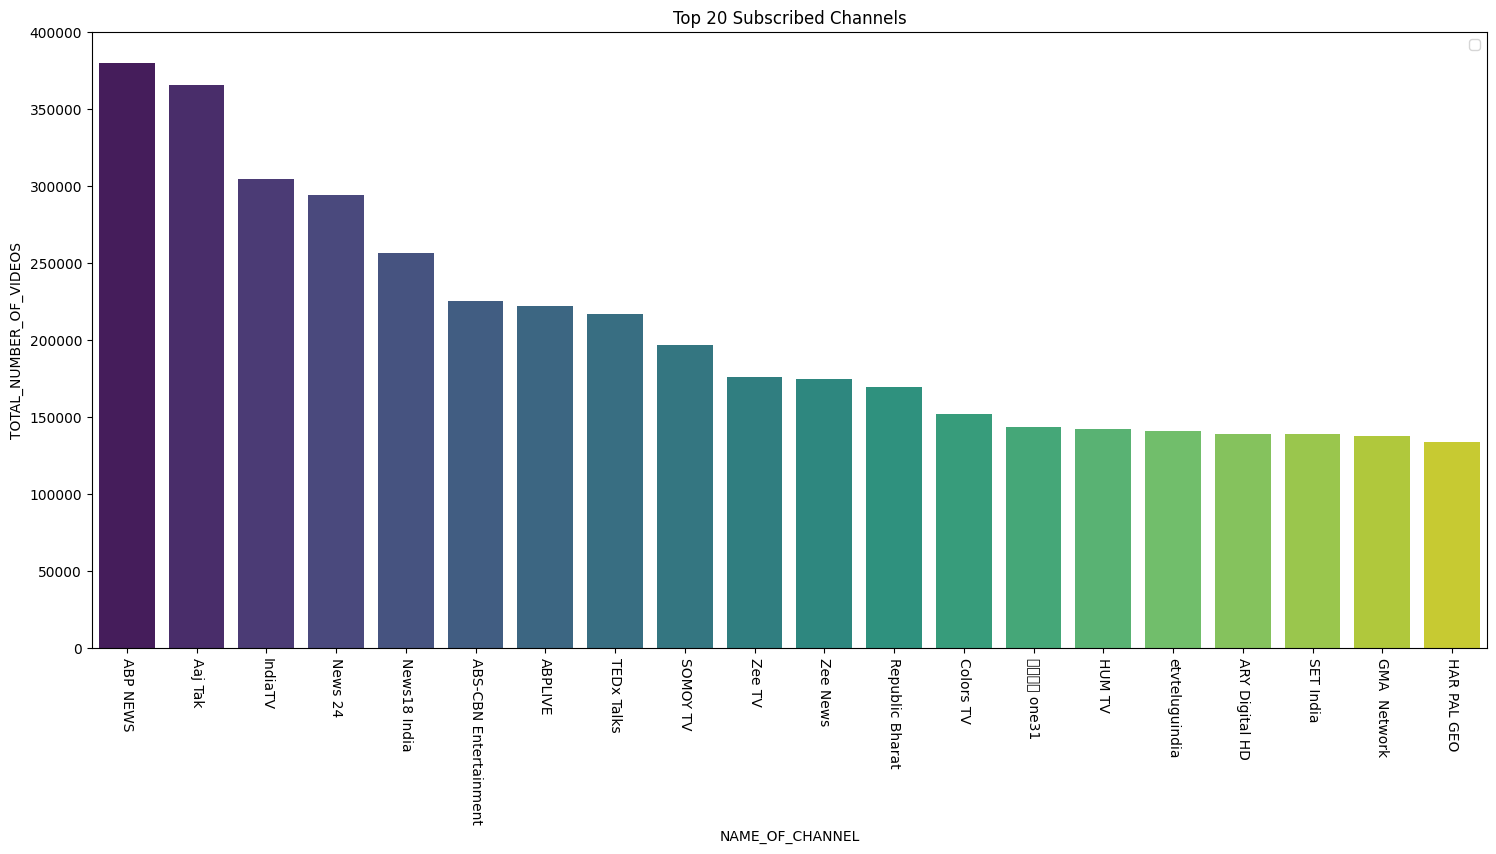

In [12]:
vids_df = df.sort_values('TOTAL_NUMBER_OF_VIDEOS', ascending = False)
vids_df = vids_df[['NAME_OF_CHANNEL', 'TOTAL_NUMBER_OF_VIDEOS', 'CATEGORY']].head(20)

plt.figure(figsize = (18, 8))
sns.barplot(vids_df, x = 'NAME_OF_CHANNEL', y = 'TOTAL_NUMBER_OF_VIDEOS', palette = 'viridis')
plt.xticks(rotation = -90)
plt.title('Top 20 Subscribed Channels')
plt.legend(loc = 'upper right')
plt.ylim(0, 400000)
plt.show()

C:\Users\shari\AppData\Local\Temp\ipykernel_15024\319002383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(views_df, x = 'NAME_OF_CHANNEL', y = 'VIEWS', palette = 'coolwarm')
C:\Users\shari\AppData\Local\Temp\ipykernel_15024\319002383.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right')


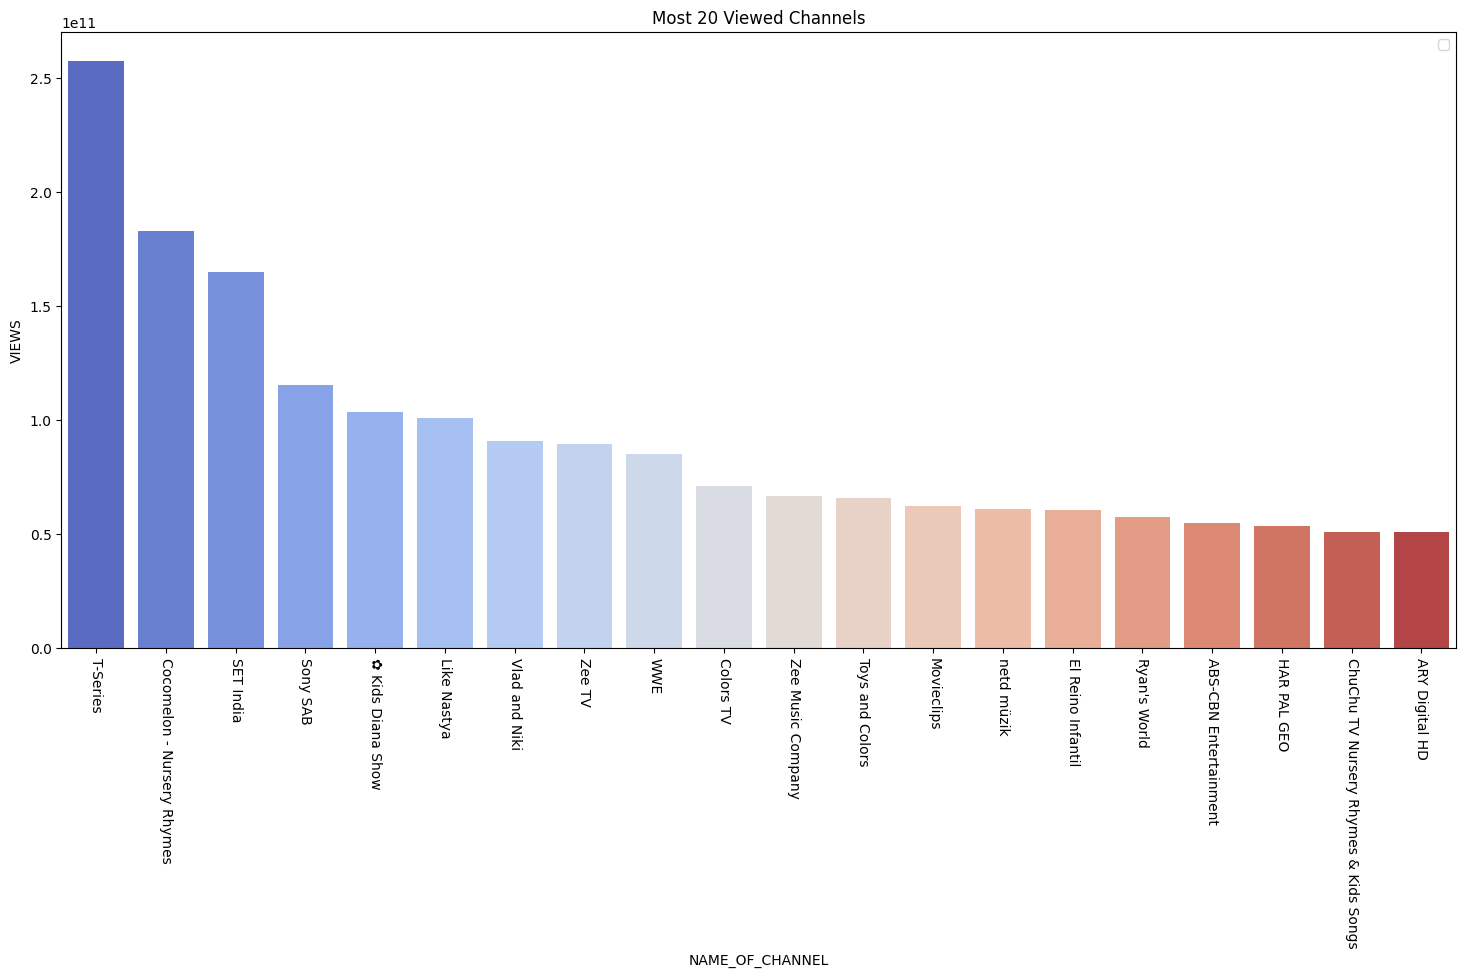

In [13]:
views_df = df.sort_values('VIEWS', ascending = False)
views_df = views_df[['NAME_OF_CHANNEL', 'VIEWS', 'CATEGORY']].head(20)

plt.figure(figsize = (18, 8))
sns.barplot(views_df, x = 'NAME_OF_CHANNEL', y = 'VIEWS', palette = 'coolwarm')
plt.xticks(rotation = -90)
plt.title('Most 20 Viewed Channels')
plt.legend(loc = 'upper right')
plt.show()

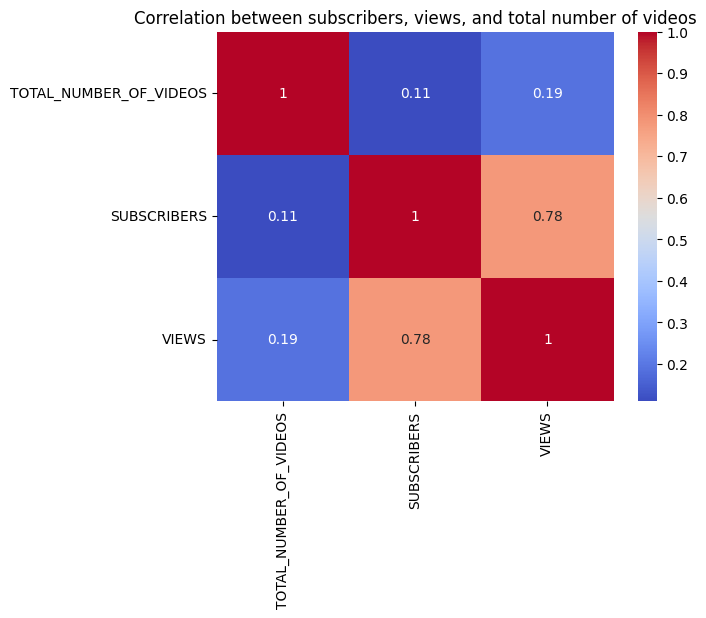

In [14]:
numeric_columns = ['TOTAL_NUMBER_OF_VIDEOS', 'SUBSCRIBERS', 'VIEWS']
corr_mat = df[numeric_columns].corr()
sns.heatmap(corr_mat, cmap = 'coolwarm', annot = True)
plt.title('Correlation between subscribers, views, and total number of videos')
plt.show()

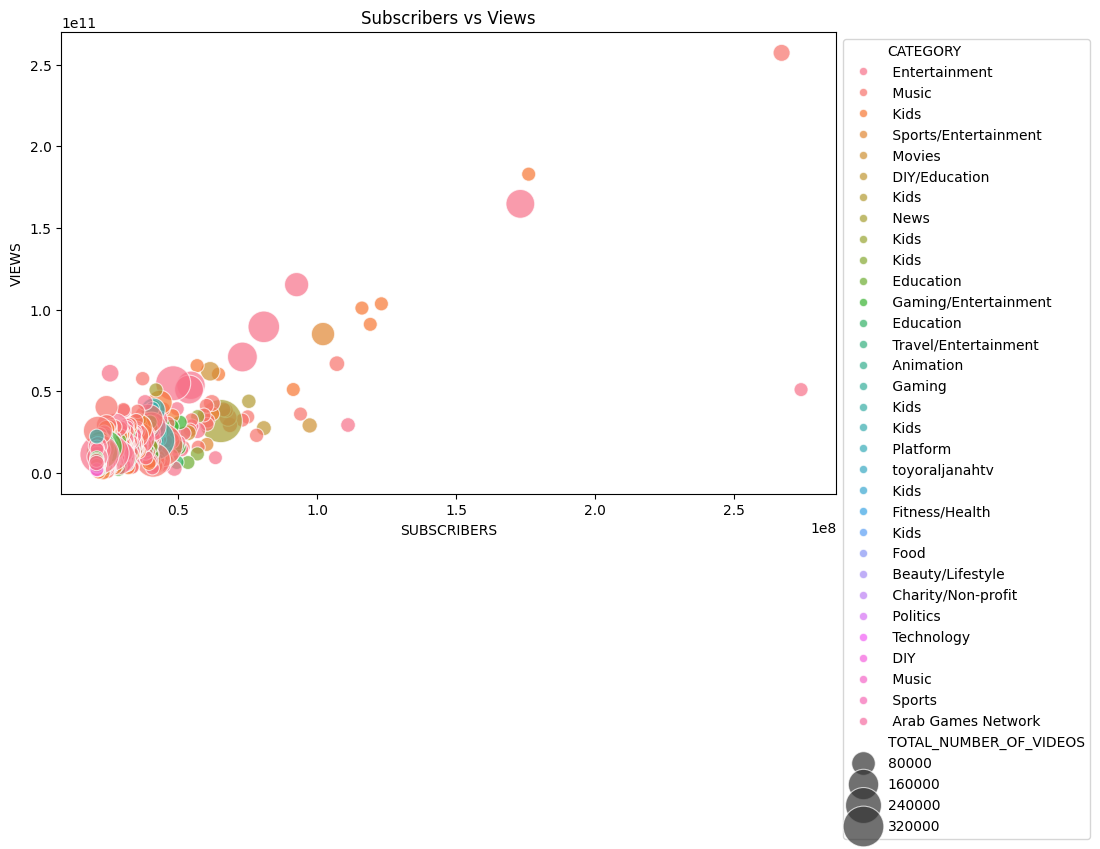

In [15]:
plt.figure(figsize = (10, 6))
sns.scatterplot(df, x = 'SUBSCRIBERS', y = 'VIEWS', hue = 'CATEGORY', alpha = 0.7, 
                 size = 'TOTAL_NUMBER_OF_VIDEOS', sizes = (100, 1000))
plt.title('Subscribers vs Views')
plt.legend(bbox_to_anchor = (1,1))
plt.show()